<a href="https://colab.research.google.com/github/laurarincon1/UDEA-ai4eng-20251/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Exploración de datos


In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from rlxutils import subplots
import matplotlib.pyplot as plt

Carga de datos

In [264]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [265]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [266]:
!chmod 600 kaggle.json


In [268]:
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [269]:
datos = pd.read_csv("train.csv")

Estructura del archivo

In [270]:
print (datos.shape) #(filas, columnas)

(692500, 21)


In [271]:
datos.head()#Visualizamos lo primeros datos del archivo

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [272]:
datos.ESTU_PRGM_ACADEMICO.value_counts()#visualizamos cuantos estudiantes hay por programa estudiantil

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
DEPORTE Y ACTIVIDADA FISICA,1
QUIMICA Y FARMACIA,1
"LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES",1


Estadísticas descriptivas de variables numéricas

In [273]:
datos.describe() #resumen numérico de las variables cuantitativas

,ID,PERIODO,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,20198.366679,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,20213.000000,0.657000,0.487000,0.320000,0.332000


In [274]:
# Resumen de variables categóricas
datos.describe(include='object')

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
count,692500,692500,686213,661643,660363,665871,669322,652727,648877,692500,686002,654397,665871,668836,692500
unique,948,31,8,5,7,2,12,2,2,2,2,2,2,12,4
top,DERECHO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
freq,53244,282159,204048,249352,232671,592514,128289,563390,412606,692466,382201,597670,592514,141744,175619


**Gráficos**

# Histogramas

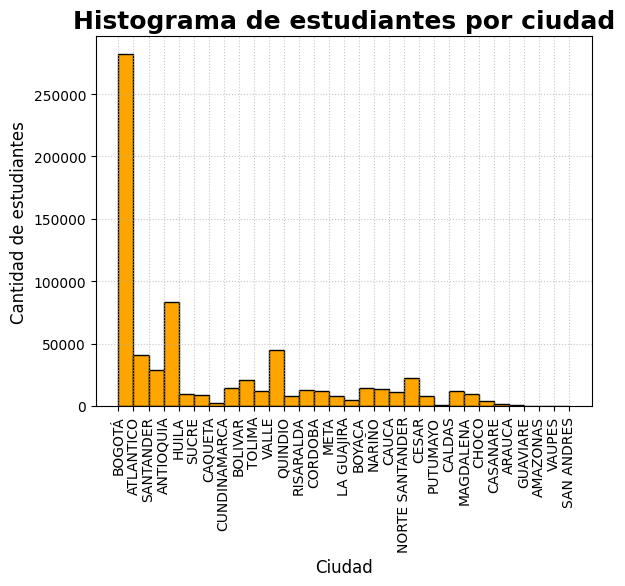

In [275]:
plt.hist(datos.ESTU_PRGM_DEPARTAMENTO.dropna().values, bins=30, color="orange", edgecolor="black");
plt.title('Histograma de estudiantes por ciudad', fontsize=18, fontweight="bold")
plt.xlabel('Ciudad', fontsize=12, rotation=0)  # Eje X horizontal
plt.ylabel('Cantidad de estudiantes', fontsize=12, rotation=90)  # Eje Y vertical


plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.7) #lineas del fondo


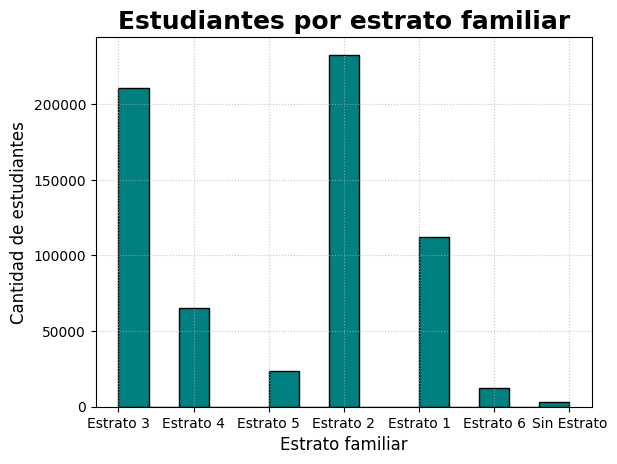

In [276]:
plt.hist(datos.FAMI_ESTRATOVIVIENDA.dropna().values, bins=15, color="teal", edgecolor="black");
plt.title('Estudiantes por estrato familiar', fontsize=18, fontweight="bold")
plt.xlabel('Estrato familiar', fontsize=12, rotation=0)  # Eje X horizontal
plt.ylabel('Cantidad de estudiantes', fontsize=12, rotation=90)  # Eje Y vertical

plt.grid(True, linestyle=':', alpha=0.7) #lineas del fondo

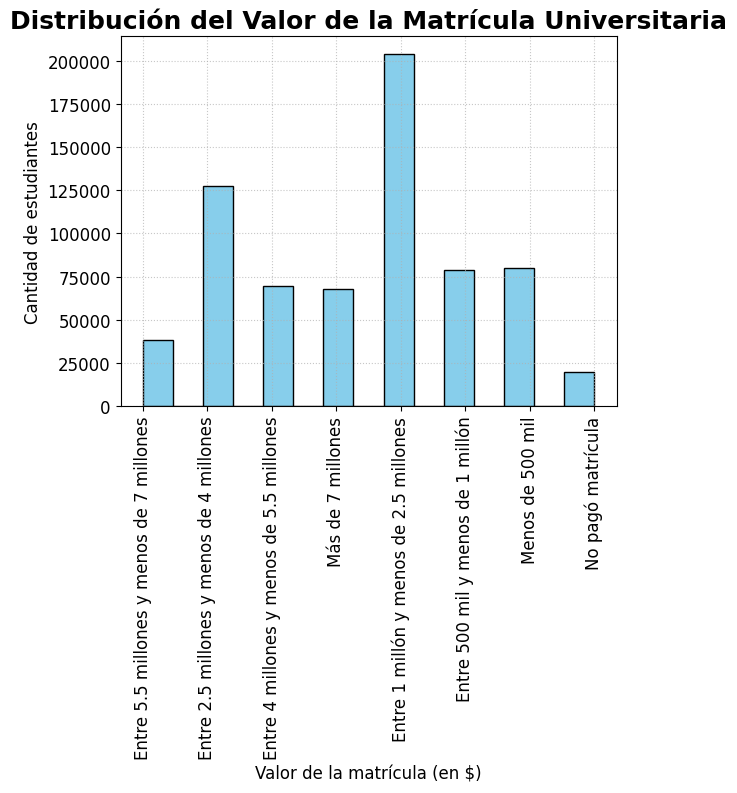

In [277]:
plt.hist(datos.ESTU_VALORMATRICULAUNIVERSIDAD.dropna().values, bins=15, color='skyblue', edgecolor='black');
plt.title('Distribución del Valor de la Matrícula Universitaria', fontsize=18, fontweight="bold")
plt.xlabel('Valor de la matrícula (en $)', fontsize=12, rotation=0)  # Eje X horizontal
plt.ylabel('Cantidad de estudiantes', fontsize=12, rotation=90)  # Eje Y vertical


plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

plt.grid(True, linestyle=':', alpha=0.7) #lineas del fondo

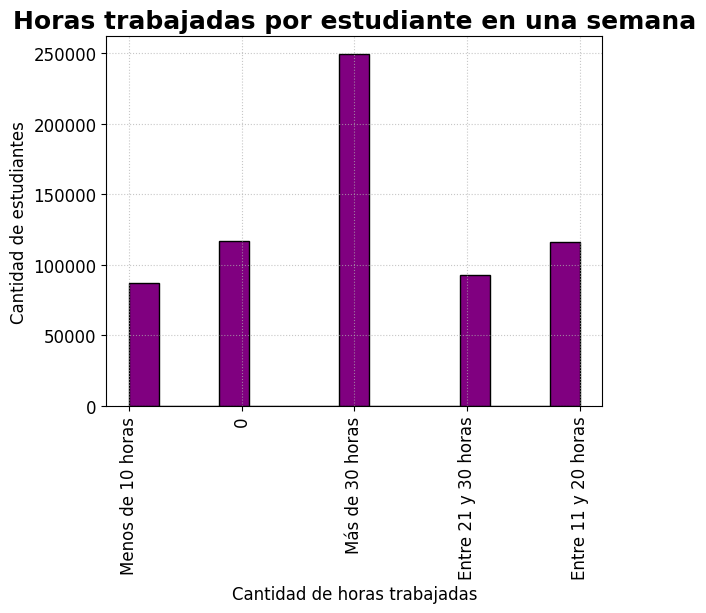

In [278]:
plt.hist(datos.ESTU_HORASSEMANATRABAJA.dropna().values, bins=15, color='purple', edgecolor='black');
plt.title('Horas trabajadas por estudiante en una semana', fontsize=18, fontweight="bold")
plt.xlabel('Cantidad de horas trabajadas', fontsize=12, rotation=0)  # Eje X horizontal
plt.ylabel('Cantidad de estudiantes', fontsize=12, rotation=90)  # Eje Y vertical


plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

plt.grid(True, linestyle=':', alpha=0.7) #lineas del fondo

<ipython-input-279-c231ca47c881>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FAMI_TIENECOMPUTADOR', data=datos, palette='viridis')


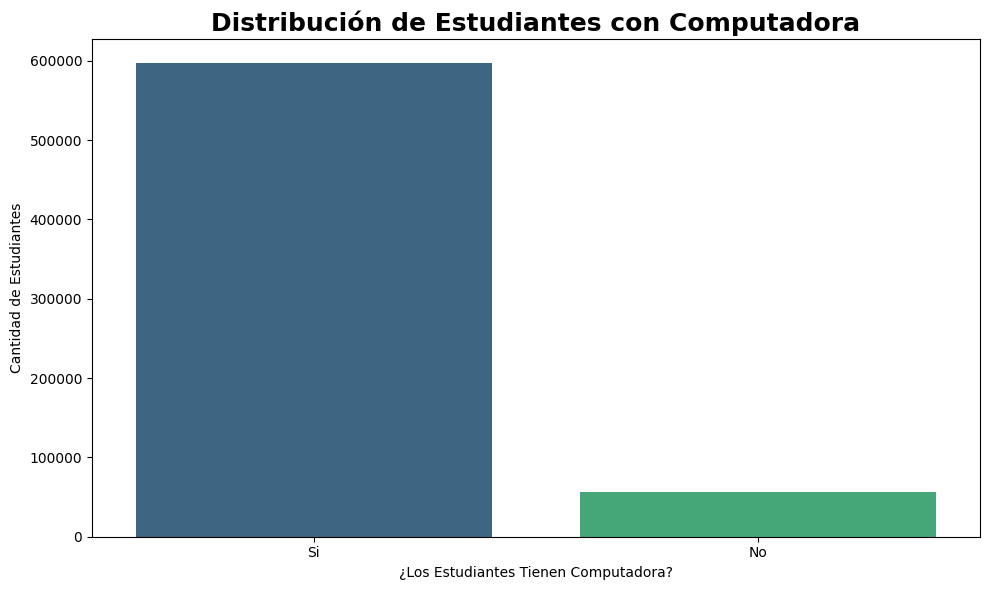

In [279]:

plt.figure(figsize=(10, 6))
sns.countplot(x='FAMI_TIENECOMPUTADOR', data=datos, palette='viridis')
plt.title('Distribución de Estudiantes con Computadora', fontsize=18, fontweight="bold")
plt.xlabel('¿Los Estudiantes Tienen Computadora?')
plt.ylabel('Cantidad de Estudiantes')
plt.tight_layout()


# Gráficos circulares

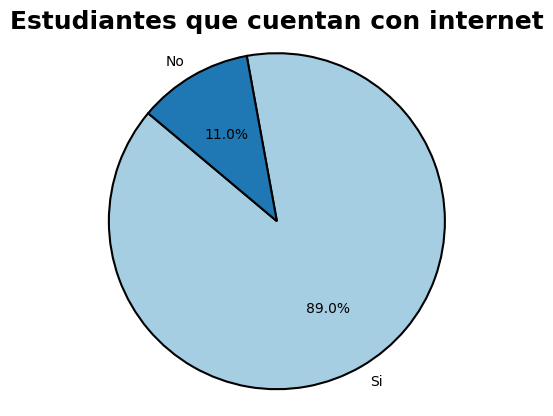

In [280]:
plt.pie(datos.FAMI_TIENEINTERNET.dropna().value_counts(), labels=datos.FAMI_TIENEINTERNET.dropna().value_counts().index,
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
plt.title('Estudiantes que cuentan con internet', fontsize=18, fontweight="bold")
plt.axis('equal')  # Para que el gráfico sea un círculo perfecto

# Mostrar el gráfico
plt.show()

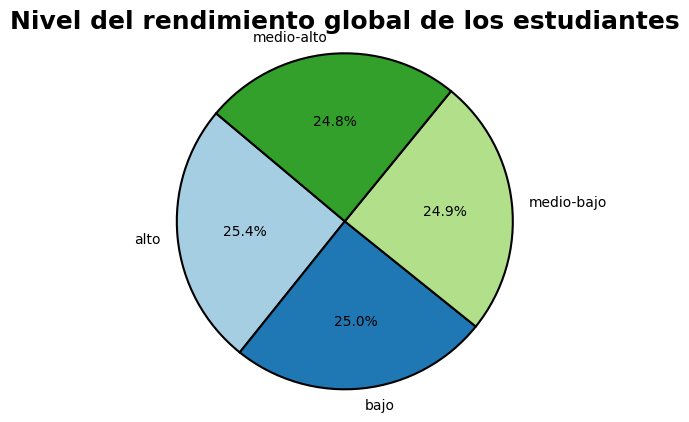

In [281]:
plt.pie(datos.RENDIMIENTO_GLOBAL.dropna().value_counts(), labels=datos.RENDIMIENTO_GLOBAL.dropna().value_counts().index,
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
plt.title('Nivel del rendimiento global de los estudiantes', fontsize=18, fontweight="bold")
plt.axis('equal')  # Para que el gráfico sea un círculo perfecto

# Mostrar el gráfico
plt.show()

# Gráficos de barras categóricos

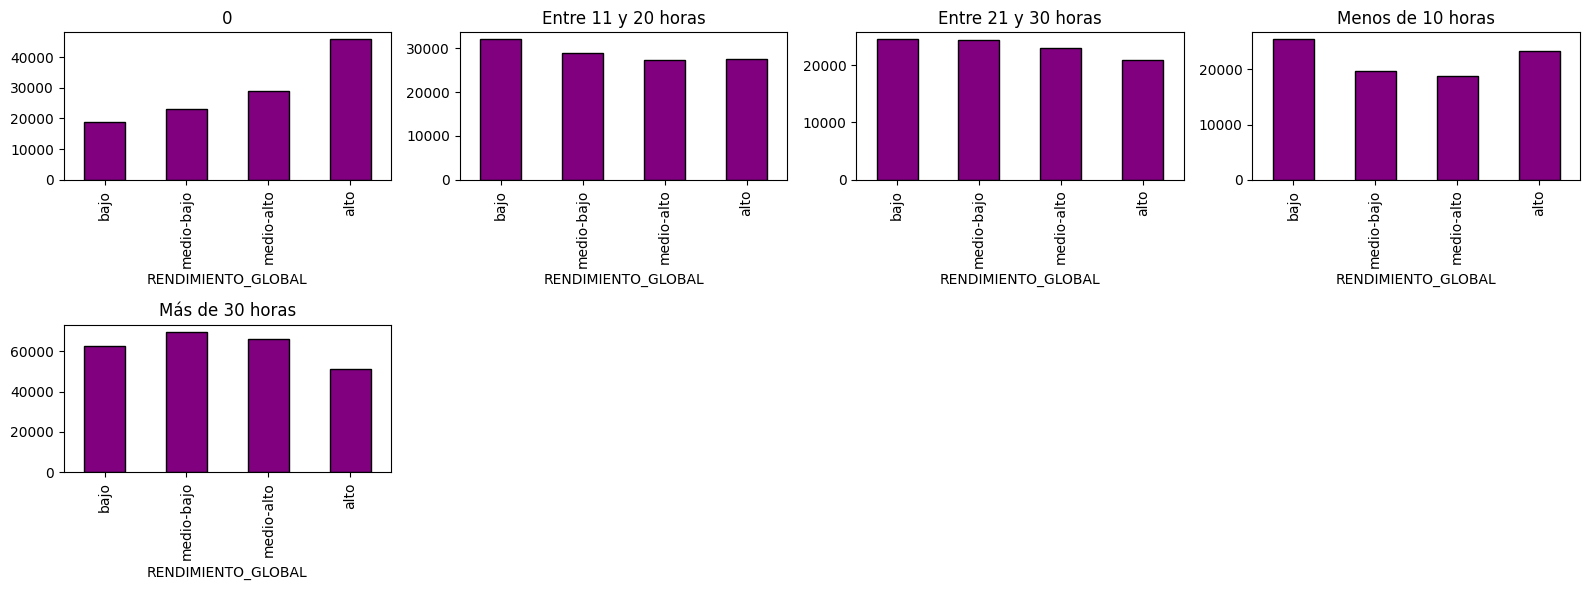

In [282]:
c = sorted(datos.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    z = datos[datos.ESTU_HORASSEMANATRABAJA==ci]
    z.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar', color='purple', edgecolor='black')
    plt.title(ci)

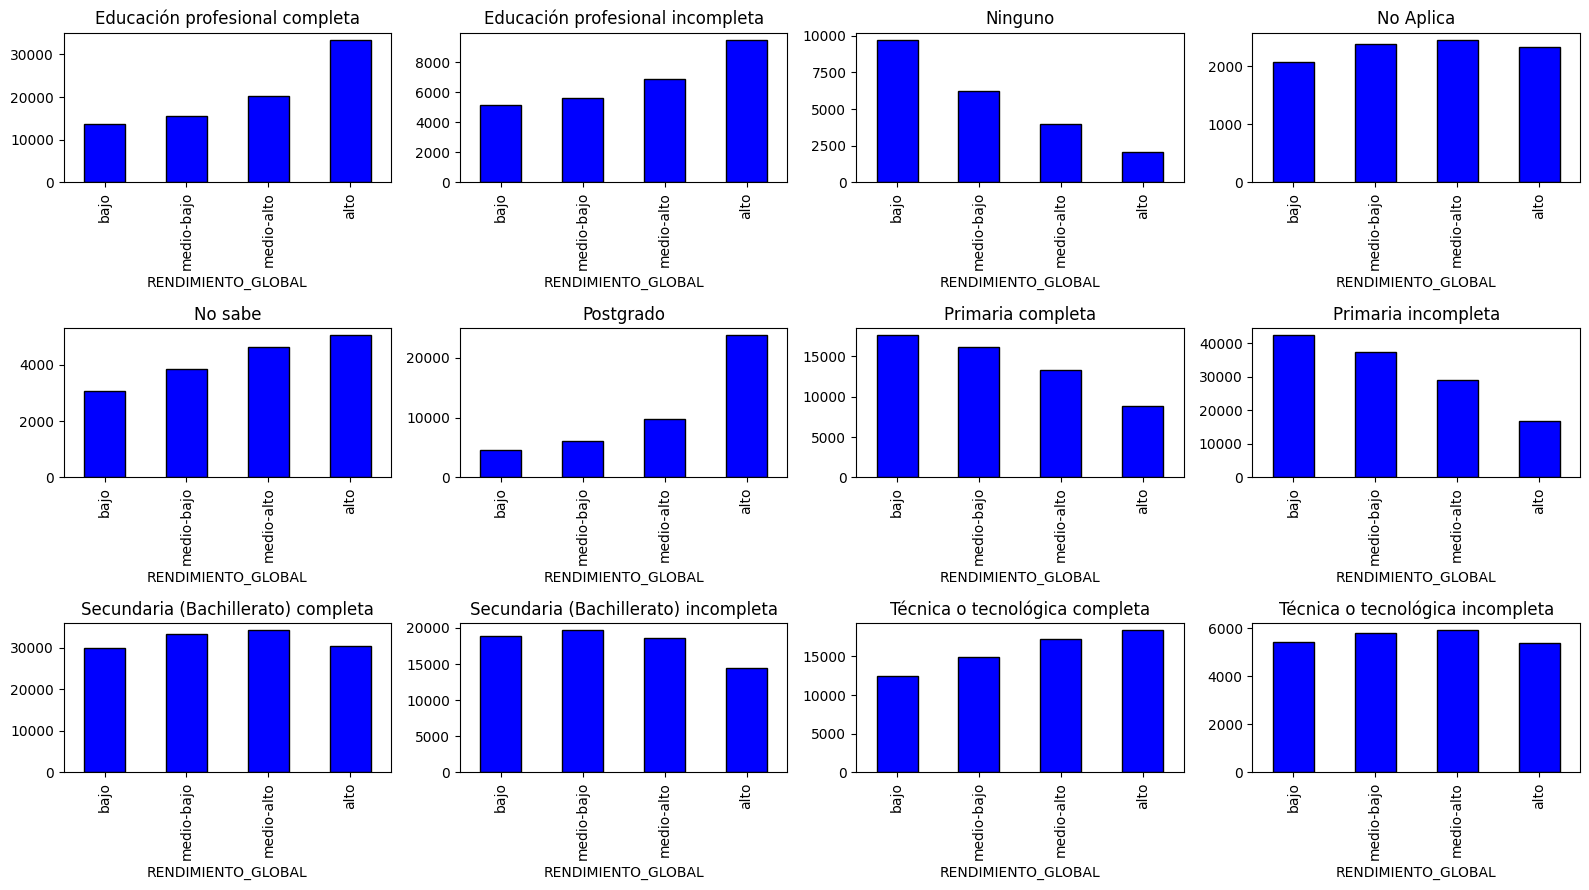

In [283]:
c = sorted(datos.FAMI_EDUCACIONPADRE.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    z = datos[datos.FAMI_EDUCACIONPADRE==ci]
    z.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar', color='blue', edgecolor='black')
    plt.title(ci)

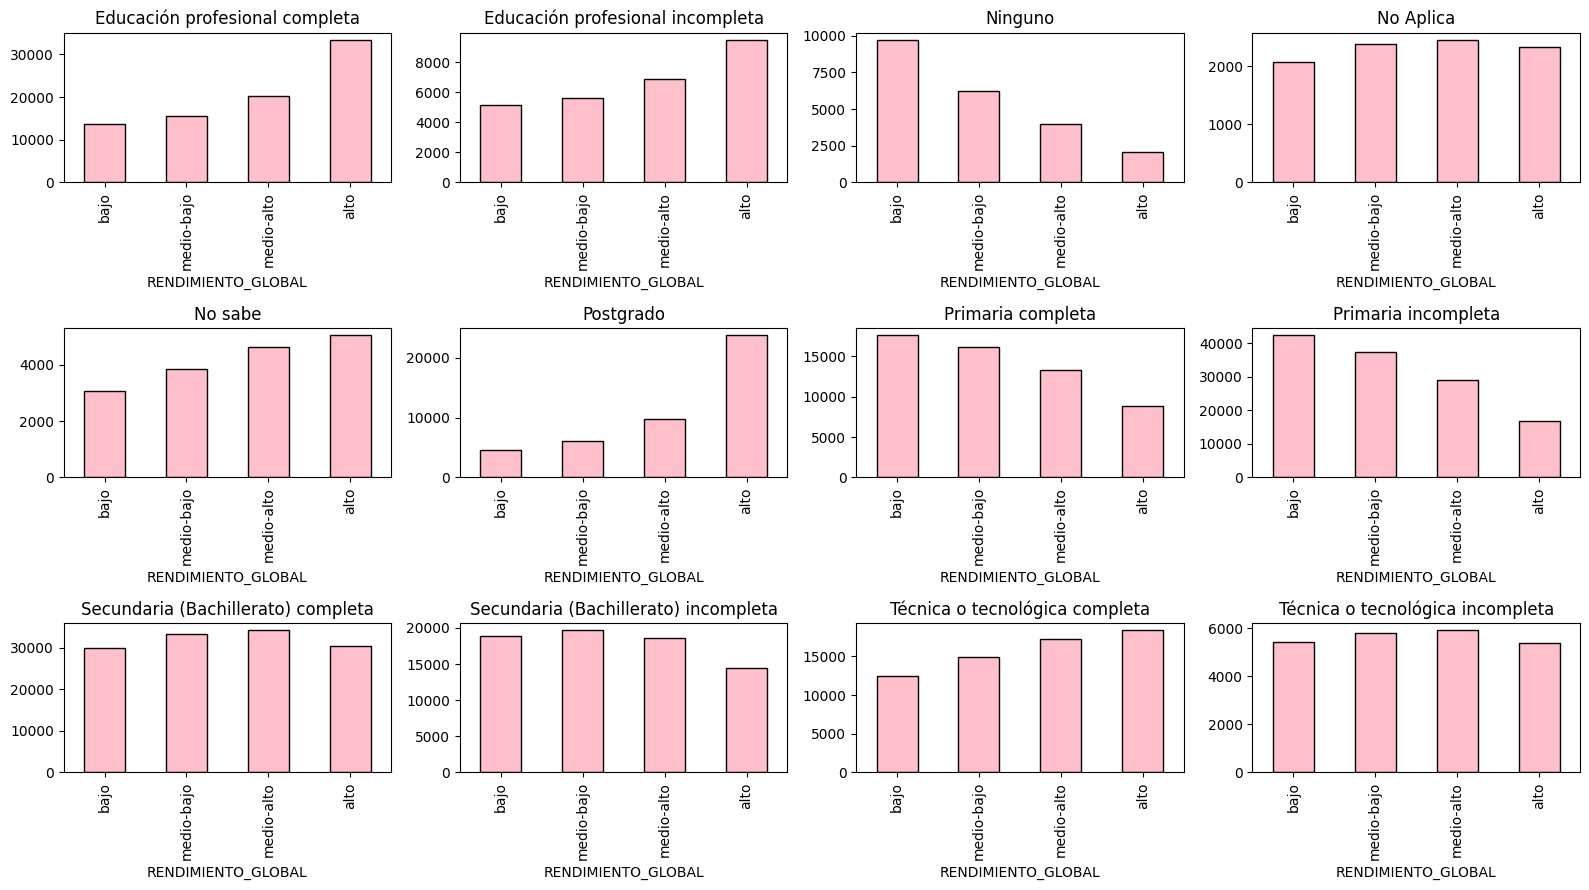

In [284]:
c = sorted(datos.FAMI_EDUCACIONPADRE.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    z = datos[datos.FAMI_EDUCACIONPADRE==ci]
    z.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar', color='pink', edgecolor='black')
    plt.title(ci)

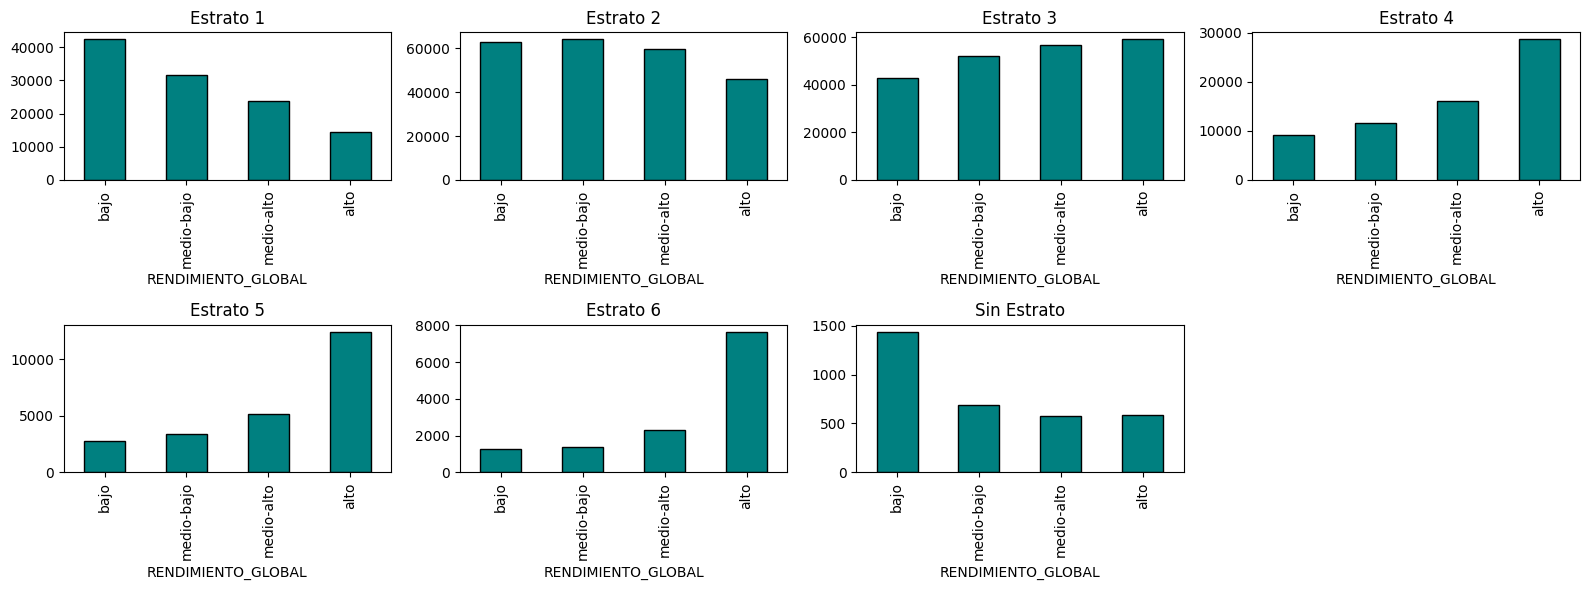

In [285]:
c = sorted(datos.FAMI_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    z = datos[datos.FAMI_ESTRATOVIVIENDA==ci]
    z.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar', color='teal', edgecolor='black')
    plt.title(ci)